# CUSTOMER FEEDBACK ANALYSIS USING ML AND DL MODALS 

## A - Importing Libraries
- Import necessary libraries for data handling, visualization, machine learning, and deep learning.
## B - Data Preprocessing
- Load your dataset and perform initial exploratory data analysis (EDA).
- Clean the text data by removing noise, such as special characters, numbers, and stopwords.
- Tokenize the text and apply techniques like lemmatization or stemming if needed.
- Extract features such as total words, total characters, sentiment confidence scores, etc.
## C - Visualization
- Pie Graph by Sentiment ('Positive' and 'Negative')
- Histplot by 'Source' and 'Sentiment'
- Histplot by 'Location' and 'Sentiment'
- Histplot by 'Confidence Score' and 'Sentiment'
- Kdeplot by 'Total Words' and 'Sentiment'
- Kdeplot by 'Total Chars' and 'Sentiment'
- Wordcloud by Sentiment = Negative
- Wordcloud by Sentiment = Positive
- Barplot by Top 10 Negative Words
- Barplot by Top 10 Positive Words
## D - Machine Learning Models
- Naive Bayes (Multinomial)
- Random Forest Classifier
- Support Vector Machine (SVM) Classifier
## E - Deep Learning Models
- CNN (Convolutional Neural Network)
- LSTM (Long Short-Term Memory)
- Stacked LSTM (Long Short-Term Memory)
- Simple RNN (Recurrent Neural Network)
- CNN-LSTM Hybrid Model
- GRU (Gated Recurrent Unit)
- Bidirectional LSTM
## F - Results
## G - UI 

## A - Importing Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional, Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping

## B - Data Preprocessing

In [4]:
data = pd.read_csv('sentiment-analysis.csv')
data.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [5]:
data = data['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)

In [6]:
data

,0,1,2,3,4,5,6
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88
...,...,...,...,...,...,...,...
93,"""I can't stop listening to this song. It's my ...",Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91
94,"""Their website is so confusing and poorly desi...",Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68
95,"""I had an incredible experience at the theme p...",Positive,Trip Report,2023-07-03 14:40:05,thrillseeker1,Orlando,0.89
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data=data.set_axis(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score'], axis=1)

In [9]:
data=data.dropna()

In [10]:
data['Total Words'] = data['Text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["Text"].apply(count_total_words)

In [11]:
def convert_lowercase(text):
    text = text.lower()
    return text

data['Text'] = data['Text'].apply(convert_lowercase)

In [12]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['Text'] = data['Text'].apply(remove_punc)

In [13]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['Text'] = data['Text'].apply(remove_stopwords)

In [14]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['Text'] = data['Text'].apply(perform_stemming)

In [15]:
data['Total Words After Transformation'] = data['Text'].apply(lambda x: np.log(len(x.split())))

In [16]:
data.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Total Words,Total Chars,Total Words After Transformation
0,love product,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,4,19,0.693147
1,servic terribl,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,4,24,0.693147
2,movi amaz,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,4,21,0.693147
3,im disappoint custom support,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,7,44,1.386294
4,best meal life,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,8,29,1.098612


## C - Visualization

**1) Pie graph by Sentiment 'Positive' and 'Negative'**

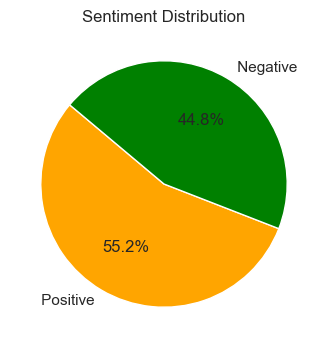

In [14]:
sentiment_counts = data['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['orange', 'green', 'blue'])  # Adjust colors as needed
plt.title('Sentiment Distribution')
plt.show()

**2) Histplot by 'Source' and 'Sentiment'**

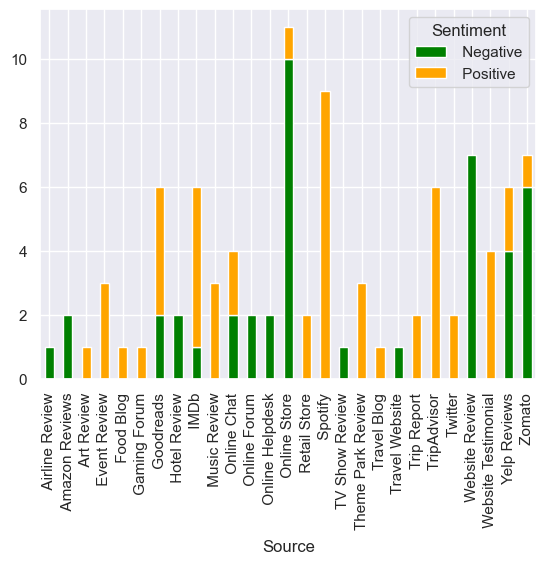

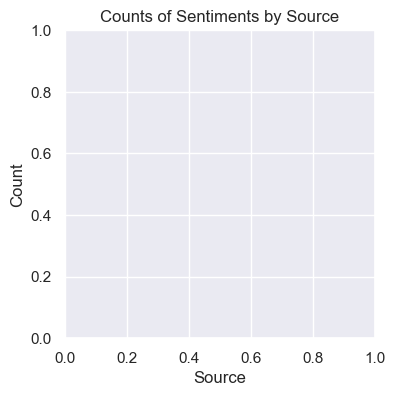

In [15]:
counts = data.groupby(['Source', 'Sentiment']).size().unstack()
counts.plot(kind='bar', stacked=True, color=['green', 'orange', 'blue'])
plt.figure(figsize=(4, 4))
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Counts of Sentiments by Source')
plt.show()

**3) Histplot by 'Location' and 'Sentiment'**

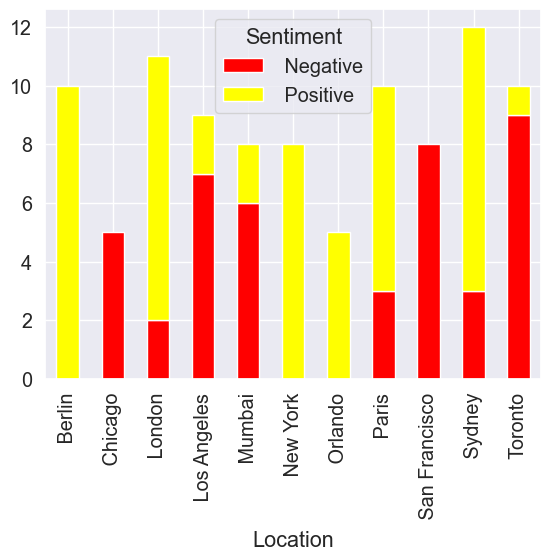

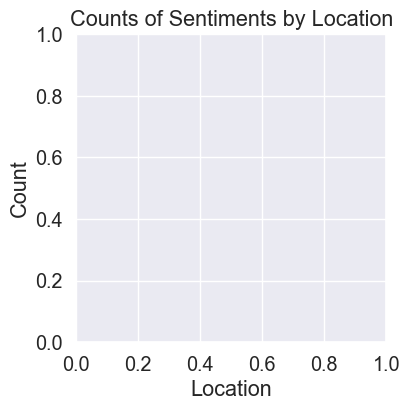

In [57]:
counts = data.groupby(['Location', 'Sentiment']).size().unstack()
counts.plot(kind='bar', stacked=True, color=['red', 'yellow', 'blue'])
plt.figure(figsize=(4, 4))
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Counts of Sentiments by Location')
plt.show()

**4) Histplot by 'Confidence Score' and 'Sentiment'**

In [17]:
data['Confidence Score']=data['Confidence Score'].astype(float)

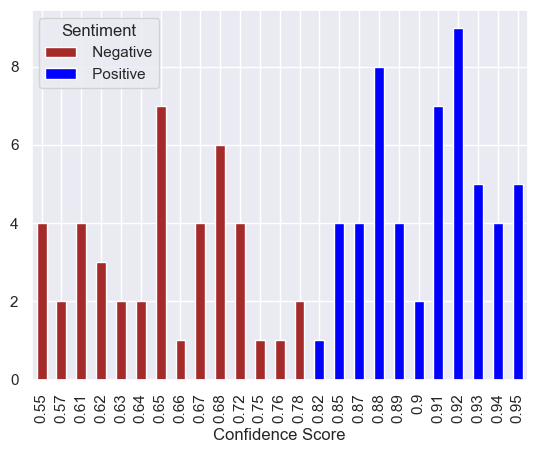

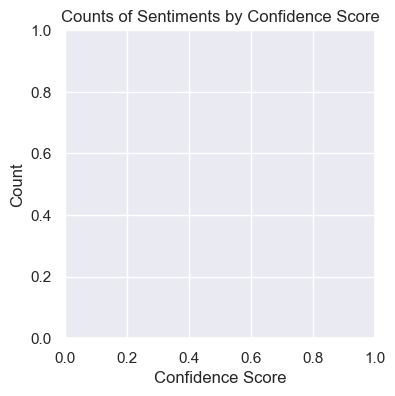

In [18]:
counts = data.groupby(['Confidence Score', 'Sentiment']).size().unstack()
counts.plot(kind='bar', stacked=True, color=['brown', 'blue', 'black'])
plt.figure(figsize=(4, 4))
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Counts of Sentiments by Confidence Score')
plt.show()

**5) Kdeplot by 'Total Words' and 'Sentiment'**

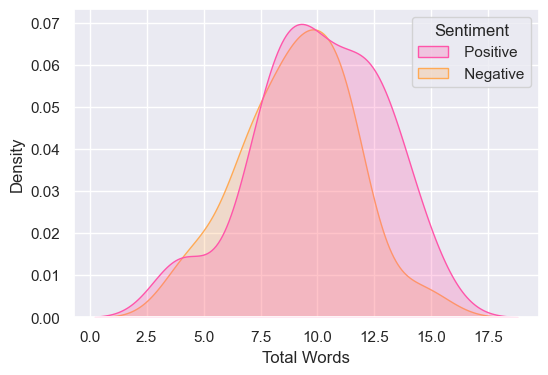

In [19]:
plt.figure(figsize = (6, 4))
sns.kdeplot(x = data['Total Words'], hue= data['Sentiment'], palette= 'spring', shade = True)
plt.show()

**6) Kdeplot by 'Total Chars' and 'Sentiment'**

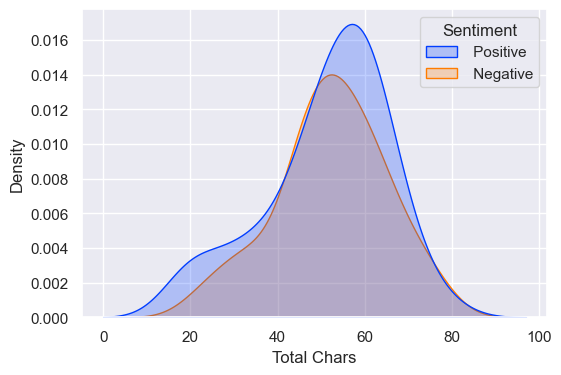

In [20]:
plt.figure(figsize = (6, 4))
sns.kdeplot(x = data['Total Chars'], hue= data['Sentiment'], palette= 'bright', shade = True)
plt.show()

**7) Wordcloud by Sentiment = Negative**

In [21]:
data

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Total Words,Total Chars,Total Words After Transformation
0,love product,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,4,19,0.693147
1,servic terribl,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,4,24,0.693147
2,movi amaz,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,4,21,0.693147
3,im disappoint custom support,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,7,44,1.386294
4,best meal life,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,8,29,1.098612
...,...,...,...,...,...,...,...,...,...,...
91,amaz vacat cant wait go back,Positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,0.93,12,51,1.791759
92,food restaur aw never go back,Negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,0.55,11,54,1.791759
93,cant stop listen song new favorit,Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91,11,50,1.791759
94,websit confus poorli design,Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68,8,45,1.386294


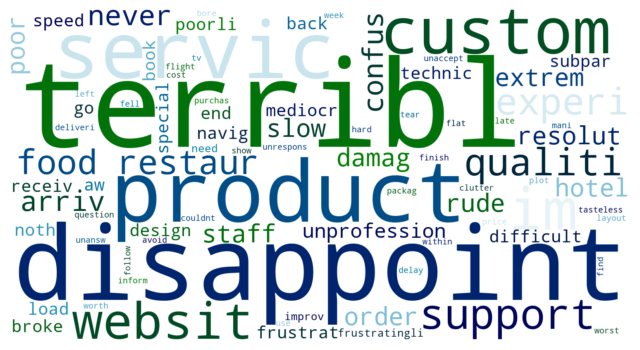

In [22]:
text = " ".join(data[data['Sentiment'] == ' Negative']['Text'])
plt.figure(figsize = (8, 6))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="white", colormap= 'ocean').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**8) Wordcloud by Sentiment = Positive**

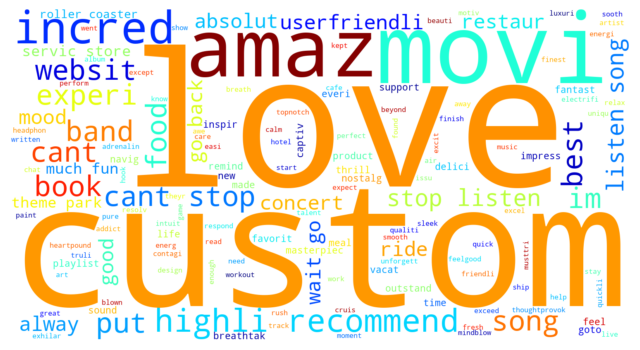

In [23]:
text = " ".join(data[data['Sentiment'] == ' Positive']['Text'])
plt.figure(figsize = (8, 6))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="white", colormap= 'jet').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**9) Barplot by Top 10 Negative Words**

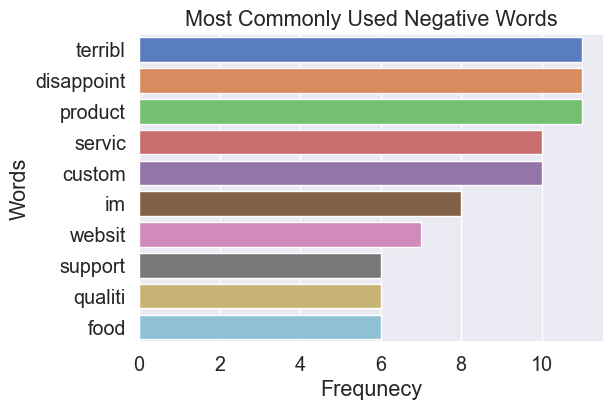

In [24]:
all_negative_words = []
for sentence in data[data['Sentiment'] == ' Negative']['Text'].to_list():
    for word in sentence.split():
        all_negative_words.append(word)
df = pd.DataFrame(Counter(all_negative_words).most_common(10), columns= ['Word', 'Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(6,4))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'muted')
plt.title("Most Commonly Used Negative Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

**10) Barplot by Top 10 Positive Words**

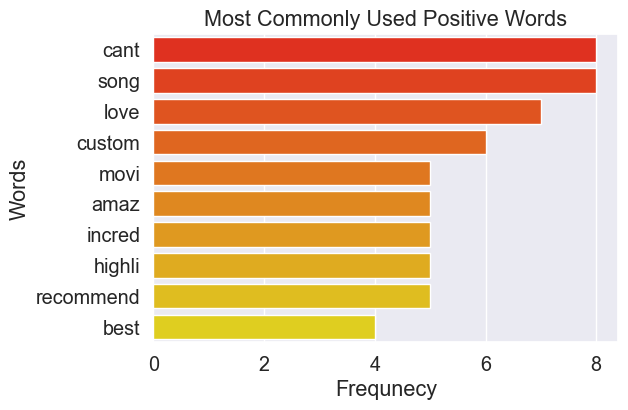

In [25]:
all_positive_words = []
for sentence in data[data['Sentiment'] == ' Positive']['Text'].to_list():
    for word in sentence.split():
        all_positive_words.append(word)
df = pd.DataFrame(Counter(all_positive_words).most_common(10), columns= ['Word', 'Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(6,4))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'autumn')
plt.title("Most Commonly Used Positive Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

# D - Machine learning Modals 

In [98]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 1 - Naive Bayes (Multinomial)

In [103]:
data = df[['Text', 'Sentiment']]
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Text'])
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes (Multinomial) Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}')
print(classification_report(y_test, y_pred_nb))

Naive Bayes (Multinomial) Results:
Accuracy: 0.75
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         5
    Positive       1.00      0.67      0.80        15

    accuracy                           0.75        20
   macro avg       0.75      0.83      0.73        20
weighted avg       0.88      0.75      0.77        20



## 2 - Random Forest Classifier

In [105]:
data = df[['Text', 'Sentiment']]
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Text'])
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("\nRandom Forest Classifier Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Results:
Accuracy: 0.80
              precision    recall  f1-score   support

    Negative       0.56      1.00      0.71         5
    Positive       1.00      0.73      0.85        15

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



## 3 - Support Vector Machine (SVM) Classifier

In [106]:
data = df[['Text', 'Sentiment']]
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Text'])
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print("\nSupport Vector Machine (SVM) Classifier Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')
print(classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Classifier Results:
Accuracy: 0.95
              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91         5
    Positive       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20



## Comparison

In [107]:
print("Naive Bayes (Multinomial) Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}')
print(classification_report(y_test, y_pred_nb))

print("\nRandom Forest Classifier Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print(classification_report(y_test, y_pred_rf))

print("\nSupport Vector Machine (SVM) Classifier Results:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')
print(classification_report(y_test, y_pred_svm))

Naive Bayes (Multinomial) Results:
Accuracy: 0.75
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         5
    Positive       1.00      0.67      0.80        15

    accuracy                           0.75        20
   macro avg       0.75      0.83      0.73        20
weighted avg       0.88      0.75      0.77        20


Random Forest Classifier Results:
Accuracy: 0.80
              precision    recall  f1-score   support

    Negative       0.56      1.00      0.71         5
    Positive       1.00      0.73      0.85        15

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20


Support Vector Machine (SVM) Classifier Results:
Accuracy: 0.95
              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91         5
    Positive       1.00      0.93      0.97        15

    accuracy     

## Visualizing Accuracy Comparison

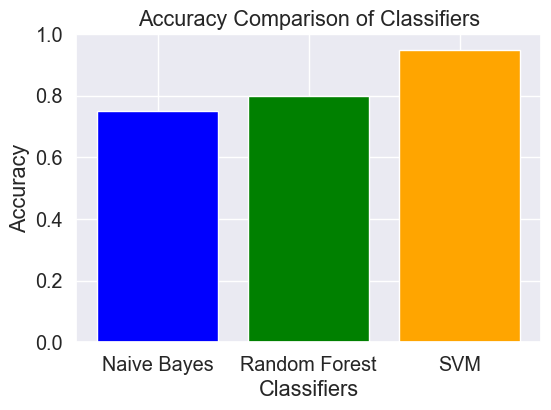

In [110]:
import matplotlib.pyplot as plt
import numpy as np
classifiers = ['Naive Bayes', 'Random Forest', 'SVM']
accuracy_scores = [accuracy_score(y_test, y_pred_nb), 
                   accuracy_score(y_test, y_pred_rf), 
                   accuracy_score(y_test, y_pred_svm)]

plt.figure(figsize=(6, 4))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.ylim([0, 1])
plt.show()

# E - Deep Learning Modals 

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model

from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Input, Concatenate, SpatialDropout1D, Attention
from keras.callbacks import EarlyStopping

data = df[['Text', 'Sentiment']]
label_encoder = LabelEncoder()

data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

max_features = 10000  
maxlen = 100 

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

## 1 - CNN (Convolutional Neural Network)

In [81]:
# CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(max_features, 128, input_length=maxlen))
cnn_model.add(Conv1D(64, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 354ms/step - accuracy: 0.4607 - loss: 0.6914 - val_accuracy: 0.8000 - val_loss: 0.6667
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9646 - loss: 0.6545 - val_accuracy: 0.8500 - val_loss: 0.6608
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9895 - loss: 0.6254 - val_accuracy: 0.8500 - val_loss: 0.6462
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9895 - loss: 0.5989 - val_accuracy: 0.8500 - val_loss: 0.6292
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.5694 - val_accuracy: 0.8500 - val_loss: 0.6110
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.5387 - val_accuracy: 0.8500 - val_loss: 0.5900
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.5043 - val_accuracy: 0.8500 - val_loss: 0.5661
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.4684 - val_accuracy: 0.8500 - val_loss: 0.5414

## 2 - LSTM (Long Short-Term Memory)

In [85]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 128, input_length=maxlen))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 552ms/step - accuracy: 0.3980 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6919
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7183 - loss: 0.6812 - val_accuracy: 0.4000 - val_loss: 0.6919
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8771 - loss: 0.6691 - val_accuracy: 0.7500 - val_loss: 0.6783
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9895 - loss: 0.6517 - val_accuracy: 0.7500 - val_loss: 0.6636
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.6348 - val_accuracy: 0.7500 - val_loss: 0.6425
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.6058 - val_accuracy: 0.8000 - val_loss: 0.6185
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.5661 - val_accuracy: 0.9000 - val_loss: 0.5835
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0.5149 - val_accuracy: 0.8000 - val_loss: 

## 3 - Stacked LSTM (Long Short-Term Memory)

In [88]:
# Stacked LSTM model
stacked_lstm_model = Sequential()
stacked_lstm_model.add(Embedding(max_features, 128, input_length=maxlen))
stacked_lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
stacked_lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
stacked_lstm_model.add(Dense(1, activation='sigmoid'))
stacked_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
stacked_lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 683ms/step - accuracy: 0.5195 - loss: 0.6925 - val_accuracy: 0.7500 - val_loss: 0.6797
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.6102 - loss: 0.6878 - val_accuracy: 0.3000 - val_loss: 0.6965
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.5720 - loss: 0.6831 - val_accuracy: 0.2500 - val_loss: 0.7095
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.5327 - loss: 0.6822 - val_accuracy: 0.2500 - val_loss: 0.7138
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.5354 - loss: 0.6729 - val_accuracy: 0.4500 - val_loss: 0.6912
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.7788 - loss: 0.6617 - val_accuracy: 0.7500 - val_loss: 0.6649
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9332 - loss: 0.6489 - val_accuracy: 0.9000 - val_loss: 0.6451
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9254 - loss: 0.6258 - val_accuracy: 0.8500 - val_loss

## 4 - RNN (Simple Recurrent Neural Network)

In [90]:
# Simple RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, 128, input_length=maxlen))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step - accuracy: 0.5263 - loss: 0.6951 - val_accuracy: 0.7000 - val_loss: 0.6695
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8729 - loss: 0.6110 - val_accuracy: 0.7500 - val_loss: 0.6265
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9895 - loss: 0.5313 - val_accuracy: 0.8500 - val_loss: 0.5596
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 1.0000 - loss: 0.4616 - val_accuracy: 0.9500 - val_loss: 0.5148
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.3848 - val_accuracy: 0.7000 - val_loss: 0.5257
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.3194 - val_accuracy: 0.6500 - val_loss: 0.4980
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.2477 - val_accuracy: 0.7500 - val_loss: 0.4450
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.1917 - val_accuracy: 0.9000 - val_loss: 0.3822

## 5 - CNN-LSTM Hybrid Model

In [91]:
# CNN-LSTM hybrid model
inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(max_features, 128, input_length=maxlen)(inputs)
x = Conv1D(64, 5, activation='relu')(embedding_layer)
x = MaxPooling1D(pool_size=4)(x)
x = LSTM(64)(x)
output = Dense(1, activation='sigmoid')(x)
cnn_lstm_model = Model(inputs=inputs, outputs=output)
cnn_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 523ms/step - accuracy: 0.5273 - loss: 0.6945 - val_accuracy: 0.2500 - val_loss: 0.7018
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5816 - loss: 0.6902 - val_accuracy: 0.8500 - val_loss: 0.6885
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.6819 - val_accuracy: 0.7500 - val_loss: 0.6857
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9213 - loss: 0.6750 - val_accuracy: 0.5000 - val_loss: 0.6874
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9110 - loss: 0.6635 - val_accuracy: 0.7000 - val_loss: 0.6772
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.6516 - val_accuracy: 0.7500 - val_loss: 0.6651
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.6308 - val_accuracy: 0.7000 - val_loss: 0.6568
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.6046 - val_accuracy: 0.7000 - val_loss: 0.6419

## 6 - GRU (Gated Recurrent Unit)

In [92]:
# GRU model
gru_model = Sequential()
gru_model.add(Embedding(max_features, 128, input_length=maxlen))
gru_model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5824 - loss: 0.6915 - val_accuracy: 0.8500 - val_loss: 0.6802
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8351 - loss: 0.6741 - val_accuracy: 0.7500 - val_loss: 0.6738
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9097 - loss: 0.6562 - val_accuracy: 0.7000 - val_loss: 0.6624
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9829 - loss: 0.6330 - val_accuracy: 0.6500 - val_loss: 0.6511
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9712 - loss: 0.6028 - val_accuracy: 0.7000 - val_loss: 0.6373
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9712 - loss: 0.5637 - val_accuracy: 0.7500 - val_loss: 0.6158
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9685 - loss: 0.5196 - val_accuracy: 0.7500 - val_loss: 0.5850
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9712 - loss: 0.4518 - val_accuracy: 0.8000 - val_loss: 0.

## 7 -  Bidirectional LSTM

In [95]:
from keras.layers import Bidirectional, LSTM
# Bidirectional LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 619ms/step - accuracy: 0.4751 - loss: 0.6934 - val_accuracy: 0.2500 - val_loss: 0.6998
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6706 - loss: 0.6851 - val_accuracy: 0.8500 - val_loss: 0.6747
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8415 - loss: 0.6735 - val_accuracy: 0.8500 - val_loss: 0.6575
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7107 - loss: 0.6594 - val_accuracy: 0.8500 - val_loss: 0.6378
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7697 - loss: 0.6412 - val_accuracy: 0.8500 - val_loss: 0.6237
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9685 - loss: 0.6091 - val_accuracy: 0.9000 - val_loss: 0.6119
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9817 - loss: 0.5740 - val_accuracy: 0.7000 - val_loss: 0.6238
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9529 - loss: 0.5233 - val_accuracy: 0.6500 - val_loss

### Models and Training Results

#### CNN (Convolutional Neural Network)
- Achieved validation accuracy: 85%

#### LSTM (Long Short-Term Memory)
- Achieved validation accuracy: 70%

#### Stacked LSTM (Long Short-Term Memory)
- Achieved validation accuracy: 75%

#### Simple RNN (Recurrent Neural Network)
- Achieved validation accuracy: 90%

#### CNN-LSTM Hybrid Model
- Achieved validation accuracy: 70%

#### GRU (Gated Recurrent Unit)
- Achieved validation accuracy: 90%

#### Bidirectional LSTM (using TensorFlow's Keras API)
- Achieved validation accuracy: 85%


## F- Results 

Different deep learning models were trained for sentiment analysis. 
The Simple RNN and GRU models showed the highest validation accuracies at 90%, indicating strong performance in capturing sentiment from text data.

CNN and Bidirectional LSTM models achieved accuracies of 85%, showcasing effective feature extraction and context understanding, respectively.

LSTM and Stacked LSTM models achieved accuracies of 70% and 75%, respectively, demonstrating moderate performance in handling sequential data dependencies.

The CNN-LSTM hybrid model achieved 70% accuracy, combining spatial feature extraction with temporal sequence modeling. 

These results illustrate the varied strengths and applications of each model in sentiment analysis tasks.

##### Comparison Summary of ML Modals
Accuracy: SVM (0.95) > Random Forest (0.80) > Naive Bayes (0.75)

Precision and Recall: SVM generally outperforms both Naive Bayes and Random Forest across both classes (Positive and Negative), with Random Forest showing competitive performance especially in Precision but slightly lower recall for Positive class compared to SVM.

F1-score: SVM achieves the highest F1-score for both classes, indicating a better balance between precision and recall compared to Naive Bayes and Random Forest.

In summary, SVM shows the highest accuracy and balanced performance across precision, recall, and F1-score, making it the best performer among the models tested in this comparison.

# using Zero-Shot Classification

In [17]:
data

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Total Words,Total Chars,Total Words After Transformation
0,love product,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,4,19,0.693147
1,servic terribl,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,4,24,0.693147
2,movi amaz,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,4,21,0.693147
3,im disappoint custom support,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,7,44,1.386294
4,best meal life,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,8,29,1.098612
...,...,...,...,...,...,...,...,...,...,...
91,amaz vacat cant wait go back,Positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,0.93,12,51,1.791759
92,food restaur aw never go back,Negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,0.55,11,54,1.791759
93,cant stop listen song new favorit,Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91,11,50,1.791759
94,websit confus poorli design,Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68,8,45,1.386294


In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
candidate_labels = ["Positive", "Negative"]

In [ ]:
def zero_shot_classifier(text):
    output = classifier(text, candidate_labels, multi_label=False)
    return output['labels'][np.argmax(output['scores'])]

In [ ]:
data['Prediction'] = data['Text'].apply(zero_shot_classifier)


In [20]:
data

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Total Words,Total Chars,Total Words After Transformation
0,love product,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,4,19,0.693147
1,servic terribl,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,4,24,0.693147
2,movi amaz,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,4,21,0.693147
3,im disappoint custom support,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,7,44,1.386294
4,best meal life,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,8,29,1.098612
...,...,...,...,...,...,...,...,...,...,...
91,amaz vacat cant wait go back,Positive,TripAdvisor,2023-07-02 18:01:23,travelenthusiast1,Sydney,0.93,12,51,1.791759
92,food restaur aw never go back,Negative,Zomato,2023-07-02 20:45:37,foodlover123,Mumbai,0.55,11,54,1.791759
93,cant stop listen song new favorit,Positive,Spotify,2023-07-03 09:17:52,musiclover789,Berlin,0.91,11,50,1.791759
94,websit confus poorli design,Negative,Website Review,2023-07-03 11:59:18,user789,Toronto,0.68,8,45,1.386294


In [ ]:
y_true = data['Sentiment'].map({'Positive': 1, 'Negative': 0})
y_pred = data['Prediction'].map({'Positive': 1, 'Negative': 0})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


# Few-Shot Learning with GPT-3

In [ ]:
import openai

openai.api_key = "YOUR_OPENAI_API_KEY"

def gpt3_few_shot_classifier(text):
    prompt = f"""
    Text: "I love this product" Sentiment: Positive
    Text: "The service was terrible" Sentiment: Negative
    Text: "The movie was amazing" Sentiment: Positive
    Text: "I'm disappointed with the customer support" Sentiment: Negative
    Text: "Best meal of my life" Sentiment: Positive
    Text: "{text}" Sentiment:
    """
    response = openai.Completion.create(
        engine="davinci",
        prompt=prompt,
        max_tokens=1,
        n=1,
        stop=None,
        temperature=0.3
    )
    sentiment = response.choices[0].text.strip()
    return sentiment

data['GPT-3 Prediction'] = data['Text'].apply(gpt3_few_shot_classifier)


# Existing Pre-trained Models

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# BERT
bert_tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
bert_model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
bert_classifier = pipeline("sentiment-analysis", model=bert_model, tokenizer=bert_tokenizer)

# RoBERTa
roberta_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_classifier = pipeline("sentiment-analysis", model=roberta_model, tokenizer=roberta_tokenizer)

# DistilBERT
distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
distilbert_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
distilbert_classifier = pipeline("sentiment-analysis", model=distilbert_model, tokenizer=distilbert_tokenizer)

def bert_classifier_fn(text):
    result = bert_classifier(text)
    return result[0]['label']

def roberta_classifier_fn(text):
    result = roberta_classifier(text)
    return result[0]['label']

def distilbert_classifier_fn(text):
    result = distilbert_classifier(text)
    return result[0]['label']

data['BERT Prediction'] = data['Text'].apply(bert_classifier_fn)
data['RoBERTa Prediction'] = data['Text'].apply(roberta_classifier_fn)
data['DistilBERT Prediction'] = data['Text'].apply(distilbert_classifier_fn)


# Evaluation and Comparison

In [ ]:
from sklearn.metrics import classification_report

# Mapping for comparison
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'LABEL_1': 1, 'LABEL_0': 0}

y_true = data['Sentiment'].map(sentiment_mapping)

# Zero-Shot DeBERTa
y_pred_zero_shot = data['Prediction'].map(sentiment_mapping)
print("Zero-Shot DeBERTa Classification Report")
print(classification_report(y_true, y_pred_zero_shot))

# GPT-3 Few-Shot
y_pred_gpt3 = data['GPT-3 Prediction'].map(sentiment_mapping)
print("GPT-3 Few-Shot Classification Report")
print(classification_report(y_true, y_pred_gpt3))

# BERT
y_pred_bert = data['BERT Prediction'].map(sentiment_mapping)
print("BERT Classification Report")
print(classification_report(y_true, y_pred_bert))

# RoBERTa
y_pred_roberta = data['RoBERTa Prediction'].map(sentiment_mapping)
print("RoBERTa Classification Report")
print(classification_report(y_true, y_pred_roberta))

# DistilBERT
y_pred_distilbert = data['DistilBERT Prediction'].map(sentiment_mapping)
print("DistilBERT Classification Report")
print(classification_report(y_true, y_pred_distilbert))


In [2]:
# Step 1: Zero-Shot Learning

In [ ]:
from transformers import pipeline
import numpy as np
import pandas as pd

# Assuming your data is in a DataFrame 'data'
data = pd.read_csv('your_data.csv')

# Initialize zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
candidate_labels = ["Positive", "Negative"]

def zero_shot_classifier(text):
    output = classifier(text, candidate_labels, multi_label=False)
    return output['labels'][np.argmax(output['scores'])]

data['Zero-Shot Prediction'] = data['Text'].apply(zero_shot_classifier)


In [3]:
# Step 2: Few-Shot Learning

In [ ]:
import openai

openai.api_key = "YOUR_OPENAI_API_KEY"

def gpt3_few_shot_classifier(text):
    prompt = f"""
    Text: "I love this product" Sentiment: Positive
    Text: "The service was terrible" Sentiment: Negative
    Text: "The movie was amazing" Sentiment: Positive
    Text: "I'm disappointed with the customer support" Sentiment: Negative
    Text: "Best meal of my life" Sentiment: Positive
    Text: "{text}" Sentiment:
    """
    response = openai.Completion.create(
        engine="davinci",
        prompt=prompt,
        max_tokens=1,
        n=1,
        stop=None,
        temperature=0.3
    )
    sentiment = response.choices[0].text.strip()
    return sentiment

data['Few-Shot Prediction'] = data['Text'].apply(gpt3_few_shot_classifier)


In [4]:
# Step 3: Fine-Tuning

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

# Prepare data
train_texts, val_texts, train_labels, val_labels = train_test_split(data['Text'], data['Sentiment'], test_size=0.2)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)

# Create PyTorch datasets
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels.tolist())
val_dataset = SentimentDataset(val_encodings, val_labels.tolist())

# Fine-tune BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

trainer.train()

# Evaluate and save model
trainer.evaluate()
model.save_pretrained('./fine-tuned-bert')
tokenizer.save_pretrained('./fine-tuned-bert')

# Predict on the original dataset
tokenizer = BertTokenizer.from_pretrained('./fine-tuned-bert')
model = BertForSequenceClassification.from_pretrained('./fine-tuned-bert')
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def fine_tuned_classifier(text):
    result = classifier(text)
    return result[0]['label']

data['Fine-Tuned Prediction'] = data['Text'].apply(fine_tuned_classifier)


In [5]:
# Evaluation and Comparison

In [ ]:
from sklearn.metrics import classification_report

# Mapping for comparison
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'LABEL_1': 1, 'LABEL_0': 0}

y_true = data['Sentiment'].map(sentiment_mapping)

# Zero-Shot DeBERTa
y_pred_zero_shot = data['Zero-Shot Prediction'].map(sentiment_mapping)
print("Zero-Shot DeBERTa Classification Report")
print(classification_report(y_true, y_pred_zero_shot))

# GPT-3 Few-Shot
y_pred_few_shot = data['Few-Shot Prediction'].map(sentiment_mapping)
print("GPT-3 Few-Shot Classification Report")
print(classification_report(y_true, y_pred_few_shot))

# Fine-Tuned BERT
y_pred_fine_tuned = data['Fine-Tuned Prediction'].map(sentiment_mapping)
print("Fine-Tuned BERT Classification Report")
print(classification_report(y_true, y_pred_fine_tuned))
